# Folder Structure

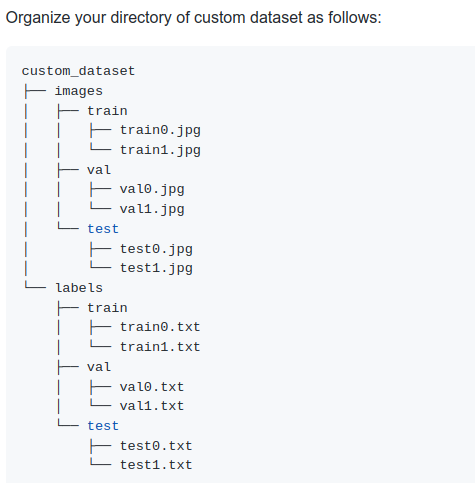


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
!nvidia-smi

In [ ]:
!git clone https://github.com/meituan/YOLOv6.git

In [ ]:
%cd /content/YOLOv6
!pip install -r requirements.txt

In [ ]:
import os
os.mkdir("weights")

In [ ]:
%cd /content/YOLOv6/weights
!wget https://github.com/meituan/YOLOv6/releases/download/0.1.0/yolov6s.pt
!wget https://github.com/meituan/YOLOv6/releases/download/0.1.0/yolov6n.pt
!wget https://github.com/meituan/YOLOv6/releases/download/0.1.0/yolov6t.pt

In [ ]:
#copt your dataset into yolov6 dir
#your images and label folder should be zipped inside one folder

%cp "/content/drive/MyDrive/yolov6/data.zip" -r "/content/YOLOv6"

In [ ]:
%cd /content/YOLOv6/data
!unzip /content/YOLOv6/data.zip

In [ ]:
%cd /content/YOLOv6

/content/YOLOv6


In [ ]:
#enter ctotal class and class names

with open('/content/YOLOv6/data/dataset.yaml', 'w') as out:

    out.write('train: ./data/images/train\n') 
    out.write('val: ./data/images/valid\n') 
    out.write('test: ./data/images/test\n') 
    out.write('is_coco: False\n')
    out.write('nc: 2\n')  
    out.write('names: ["floor_clean", "deep_clean"]')

In [ ]:
weights_save_location = "/content/drive/MyDrive/yolov6"

#Select your Configs for training model


*   configs/yolo6_tiny.py
*   configs/yolov6n_finetune.py
*   configs/yolov6s_finetune.py





In [ ]:
!python tools/train.py --img 512 --batch 32 --conf configs/yolov6s_finetune.py --data data/dataset.yaml --output /content/drive/MyDrive/yolov6/models --device 0

In [ ]:
#enter location to copy weights file to drive

drive_location = "/content/drive/MyDrive/yolov6/models/"

%cp "/content/YOLOv6/runs/train" -r "/content/drive/MyDrive/yolov6/models/"
print(f"Weights copy to drive location {drive_location}")

Weights copy to drive location /content/drive/MyDrive/yolov6/models/


##Export ONNX Model

In [ ]:
!pip install onnx>=1.10.0

In [ ]:
!python ./deploy/ONNX/export_onnx.py \
    --weights /content/YOLOv6/runs/train/exp3/weights/best_ckpt.pt \
    --img 512 \
    --batch 1

In [ ]:
%cp /content/YOLOv6/runs/train/exp3/weights/best_ckpt.onnx -r /content/drive/MyDrive/yolov6/onxx_weight

##inference on Images

In [ ]:
#provide the image folder to run inference

img_folder = "/content/YOLOv6/data/images/test/"
weights_location = "/content/YOLOv6/runs/train/exp3/weights/best_ckpt.pt"

In [ ]:
# infer on all images in our /test directory
!python tools/infer.py --yaml .git//data/dataset.yaml --img-size 512 --weights weights_location --source img_folder --device 0

In [ ]:
# display test inference result images
import glob
from IPython.display import Image, display

for imageName in glob.glob('/content/YOLOv6/runs/inference/exp/*.jpg'): #assuming JPG
    display(Image(filename=imageName))
    print("\n\n")

##inference on video

In [ ]:
os.mkdir("/content/dataset")

In [ ]:
#provide the video path

video_path = "/content/drive/MyDrive/yolo/input_video/2.mp4"

In [ ]:
import cv2
import os

def FrameCapture(path):
	image_size = (512,512)
	vidObj = cv2.VideoCapture(path)
	count = 0
	success = 1
	try:
		while success:
			success, image = vidObj.read()
			img = cv2.resize(image, image_size)
			cv2.imwrite(f"/content/dataset/{count}.jpg", img)
			count += 1
	except:
		print("Task done successfully")

if __name__ == '__main__':
	FrameCapture(video_path)

Task done successfully


In [ ]:
#running inference
!python tools/infer.py --yaml /content/YOLOv6/data/dataset.yaml --img-size 512 --weights /content/drive/MyDrive/yolov6/models/train/exp5/weights/best_ckpt.pt --source /content/dataset --device 0

In [ ]:
%mkdir "/content/result_video"

In [ ]:
import cv2

def generate_video():
    image_folder = '/content/YOLOv6/runs/inference/exp/' # make sure to use your folder
    video_name = '/content/result_video/output.avi'

    images = os.listdir(image_folder)
    images = sorted(images, key=lambda x: int(x.split('.')[0]))
                
    print(images)
    frame = cv2.imread(os.path.join(image_folder, images[0]))
    
    # setting the frame width, height width
    # the width, height of first image
    height, width, layers = frame.shape  

    video = cv2.VideoWriter(video_name, 0, 15, (width, height)) 

    # Appending the images to the video one by one
    for image in images: 
        video.write(cv2.imread(os.path.join(image_folder, image))) 
        
    # Deallocating memories taken for window creation
    # cv2.destroyAllWindows() 
    video.release()  # releasing the video generated

generate_video()


##View processed video

In [ ]:
%cd /content/result_video

/content/result_video


In [ ]:
# define helper function to display videos
import io 
from IPython.display import HTML
from base64 import b64encode
def show_video(file_name, width=512):
  # show resulting deepsort video
  mp4 = open(file_name,'rb').read()
  data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
  return HTML("""
  <video width="{0}" controls>
        <source src="{1}" type="video/mp4">
  </video>
  """.format(width, data_url))

In [ ]:
# convert resulting video from avi to mp4 file format
import os
path_video = "/content/result_video/output.avi"

%cd /content/result_video/
!ffmpeg -y -loglevel panic -i output.avi output.mp4

# output video
path_output = "/content/result_video/output.mp4"

/content/result_video


In [ ]:
show_video(path_output, width=512)